In [18]:
import librosa
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt
import sounddevice as sd

In [19]:
# Function takes in file input and plots the signal.
def load_speech_signal(filename):
# Load the speech signal from a file
    y, sr = librosa.load(filename)
    return y, sr

In [20]:
def calculate_derivative(signal):
    # """Calculates the first derivative of a signal using the finite difference method."""
    derivative = np.diff(signal)
    return derivative

In [21]:
def play_audio(signal, sr):
    # """Plays the audio signal."""
    sd.play(signal, samplerate=sr)
    sd.wait()

In [22]:
def plot_signal(signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

In [23]:
def detect_zero_crossings(signal):
    # """Detects zero crossings in a signal."""
    crossings = np.where(np.diff(np.sign(signal)))[0]
    return crossings

In [24]:
def analyze_zero_crossings(first_derivative, threshold=1000):
    """Analyzes zero crossings in the first derivative signal."""
    # Find zero crossings
    zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
    zero_crossing_diffs = np.diff(zero_crossings)

    # Distinguish between speech and silence based on the threshold
    speech_intervals = zero_crossing_diffs[zero_crossing_diffs > threshold]
    silence_intervals = zero_crossing_diffs[zero_crossing_diffs <= threshold]

    # Calculate average lengths
    avg_speech_interval_length = np.mean(speech_intervals)
    avg_silence_interval_length = np.mean(silence_intervals)

    # Print average lengths
    print("Average length between consecutive zero crossings in speech regions:", avg_speech_interval_length)
    print("Average length between consecutive zero crossings in silence regions:", avg_silence_interval_length)

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.plot(zero_crossing_diffs, label='All intervals', color='red')
    plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
    plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals, 'bo', label='Silence intervals', color='green')
    plt.title('Pattern of Zero Crossings')
    plt.xlabel('Interval Index')
    plt.ylabel('Difference between Consecutive Zero Crossings')
    plt.legend()
    plt.show()

In [25]:
# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

In [26]:
def compare_audio_files(file_list_1, file_list_2):
    for i, (file_1, file_2) in enumerate(zip(file_list_1, file_list_2), start=1):
        # Load audio files
        y1, sr1 = load_speech_signal(file_1)
        y2, sr2 = load_speech_signal(file_2)

        # Duration of audio files
        duration1 = librosa.get_duration(y=y1, sr=sr1)
        duration2 = librosa.get_duration(y=y2, sr=sr2)

        print(f"Duration of audio file {i} from list 1:", duration1, "seconds")
        print(f"Duration of audio file {i} from list 2:", duration2, "seconds")

        # Remove silence from audio signals
        y1_trimmed = remove_silence(y1, sr1)
        y2_trimmed = remove_silence(y2, sr2)

        # Calculate the time axes for the trimmed audio files
        time1 = np.linspace(0, len(y1_trimmed) / sr1, len(y1_trimmed))
        time2 = np.linspace(0, len(y2_trimmed) / sr2, len(y2_trimmed))

        # Plot the trimmed audio files
        plt.figure(figsize=(16, 6))
        plt.plot(time1, y1_trimmed, label='Prahas')
        plt.plot(time2, y2_trimmed, label='Anjali')
        plt.legend()
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'Comparison of audio files {i} from both lists')
        plt.show()


In [27]:
def plot_audio_waveforms(file_1, file_2):
    # Load audio signals
    statement_signal, sr_statement = librosa.load(file_1)
    question_signal, sr_question = librosa.load(file_2)

    # Plot waveforms
    plt.figure(figsize=(8, 5))

    # Plot statement waveform
    plt.subplot(2, 1, 1)
    plt.plot(statement_signal)
    plt.title('Statement Waveform')

    # Plot question waveform
    plt.subplot(2, 1, 2)
    plt.plot(question_signal)
    plt.title('Question Waveform')

    plt.tight_layout()
    plt.show()

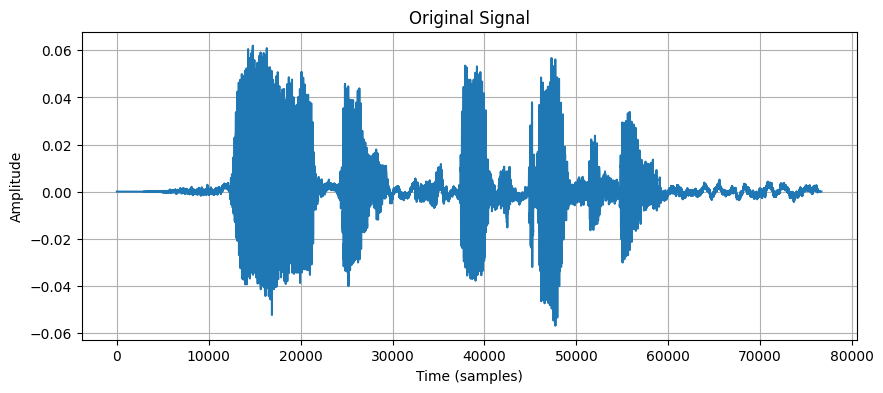

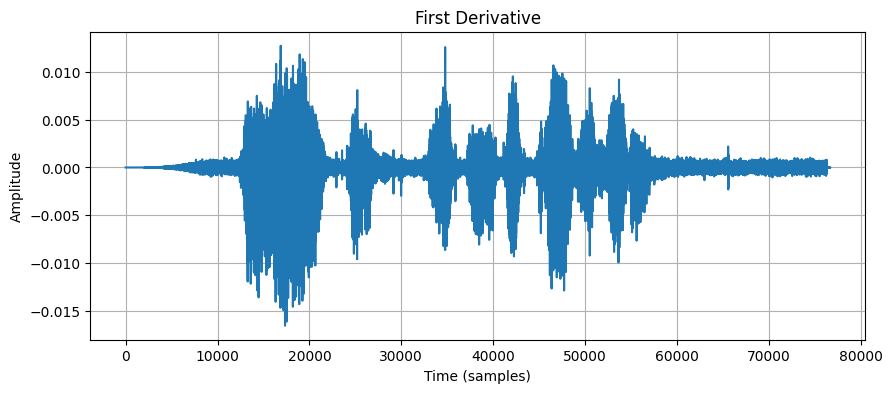

In [28]:
# A1. Load the recorded speech file and plot the signal
filename = r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio.mp3"
speech_signal, sr = load_speech_signal(filename)
# Calculate the first derivative
derivative = calculate_derivative(speech_signal)

# Play the original and derivative signals
play_audio(speech_signal, sr)
plot_signal(speech_signal, "Original Signal")
play_audio(derivative, sr)
plot_signal(derivative, "First Derivative")

C:\Users\Prahas\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Prahas\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Prahas\AppData\Local\Temp\ipykernel_4388\743738212.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
C:\Users\Prahas\AppData\Local\Temp\ipykernel_4388\743738212.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(si

Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 2.28088320038822


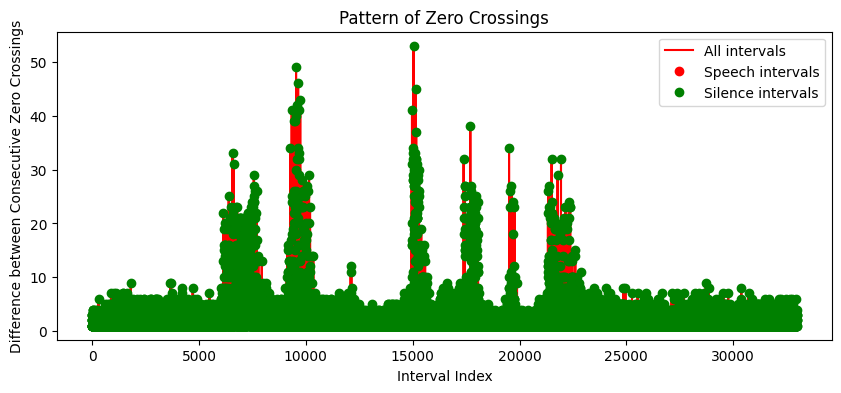

In [29]:
analyze_zero_crossings(derivative)

Duration of audio file 1 from list 1: 2.0900226757369613 seconds
Duration of audio file 1 from list 2: 1.3866666666666667 seconds


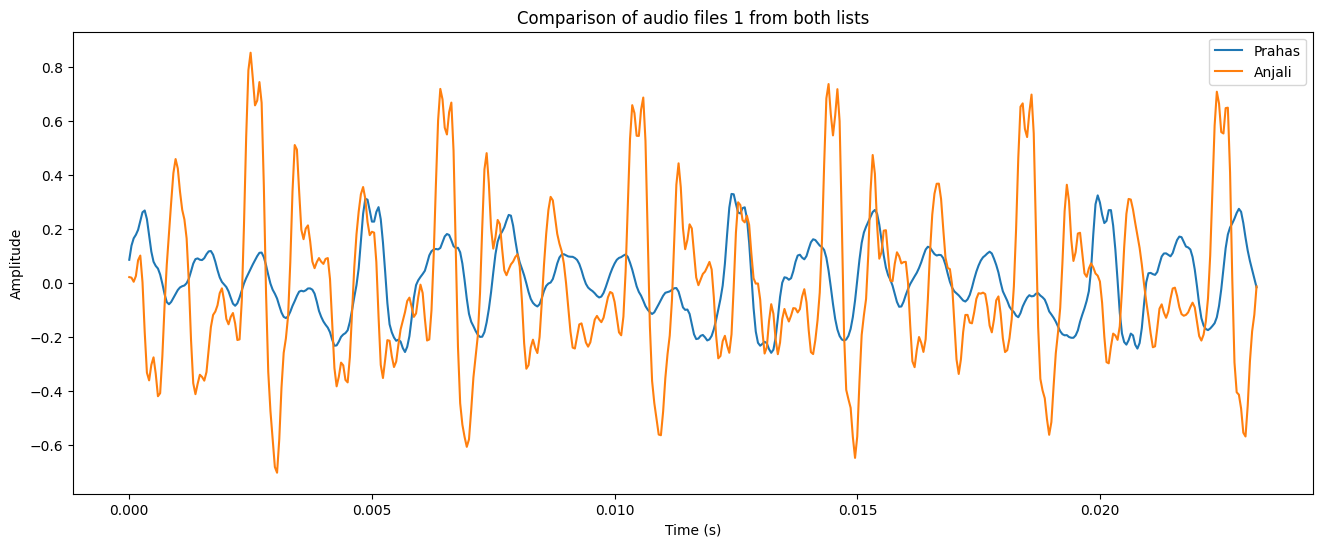

Duration of audio file 2 from list 1: 2.38 seconds
Duration of audio file 2 from list 2: 1.770702947845805 seconds


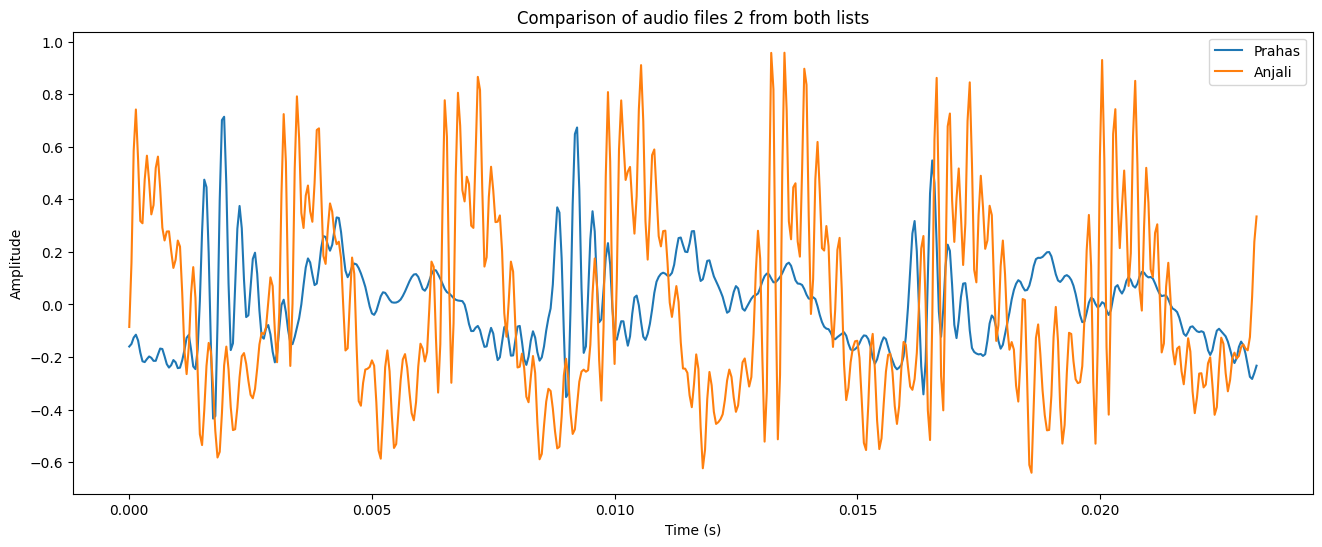

Duration of audio file 3 from list 1: 2.1 seconds
Duration of audio file 3 from list 2: 2.0053514739229024 seconds


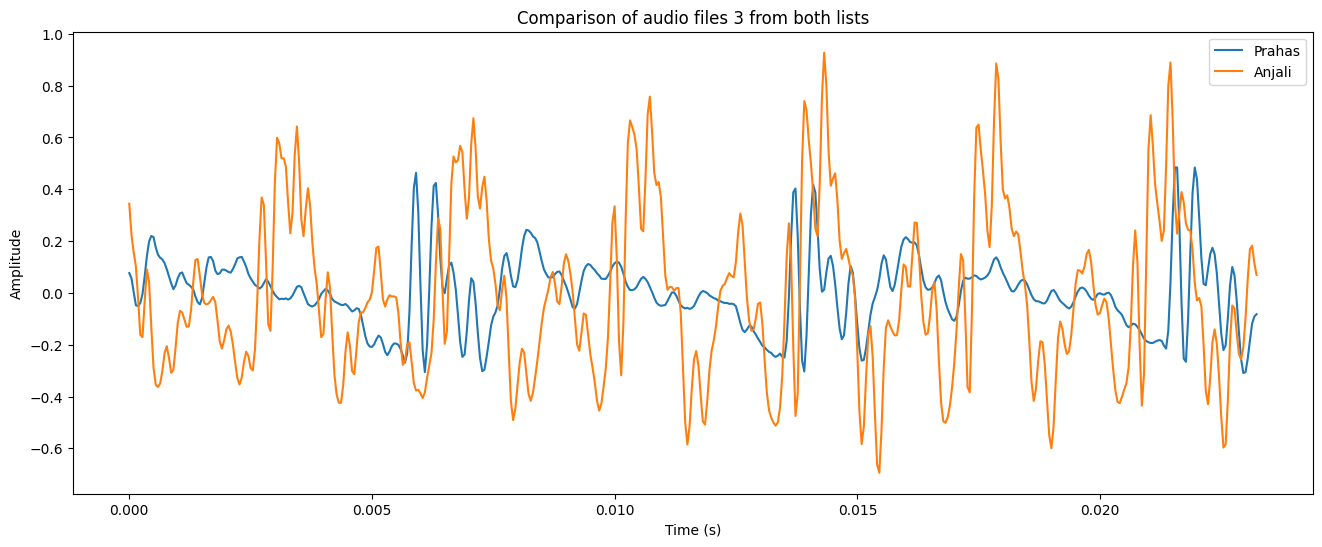

Duration of audio file 4 from list 1: 2.4100226757369616 seconds
Duration of audio file 4 from list 2: 2.048027210884354 seconds


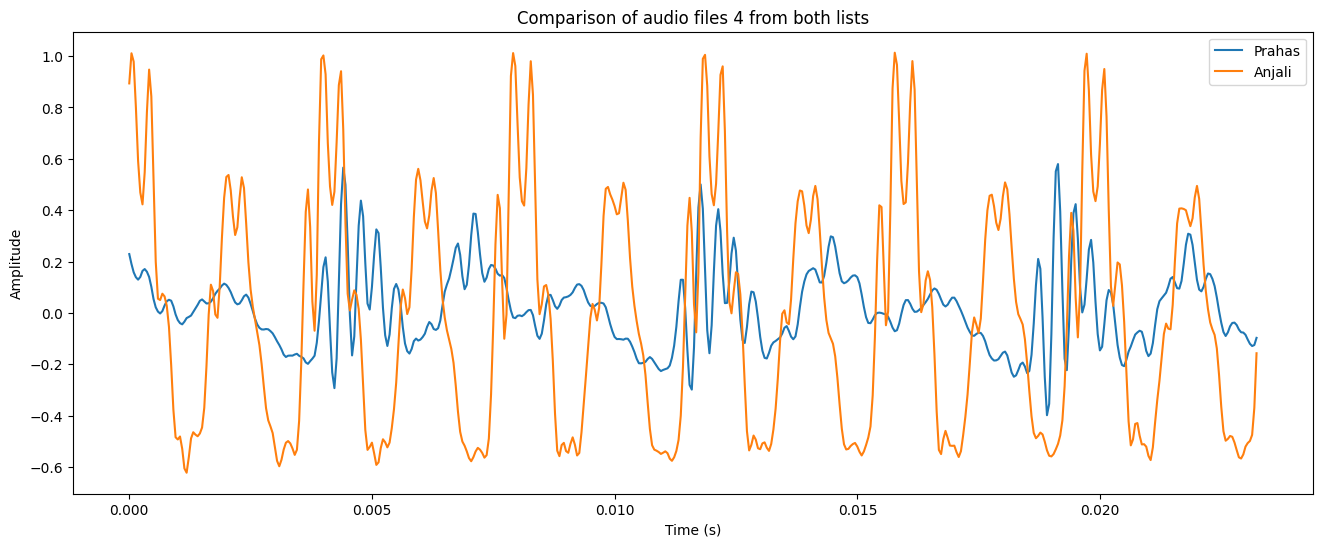

Duration of audio file 5 from list 1: 2.3300226757369615 seconds
Duration of audio file 5 from list 2: 2.24 seconds


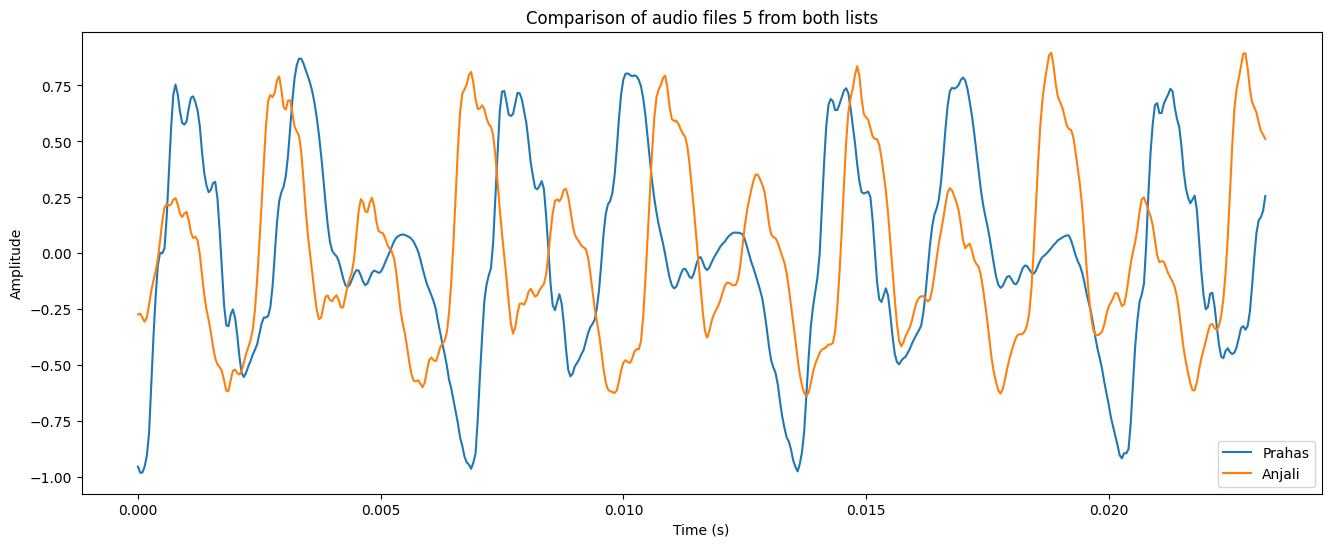

In [30]:
my_files = [r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p1.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p2.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p3.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p4.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p5.wav"]
teammate_files=[r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a1.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a2.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a3.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a4.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a5.wav"]
# Call the function with your file lists
compare_audio_files(my_files, teammate_files)

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

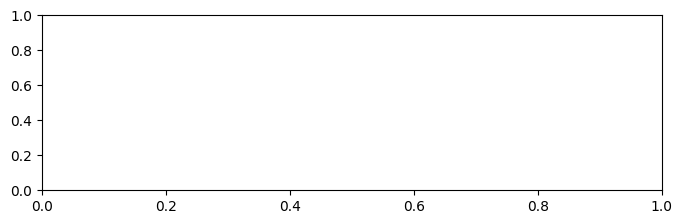

In [31]:
# Example usage:
statement = r'E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\Statement.wav'
question = r'E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\Question.wav'
plot_audio_waveforms(statement,question)